# Optimal K in `K-Means Clustering`:

## Introduction
K-means clustering is a fundamental method in data science for grouping similar data points into clusters. The selection of the right number of clusters, known as K, is crucial for the method's effectiveness. This guide provides a detailed explanation of two popular techniques for determining the optimal K: the Elbow Method and Silhouette Analysis. It includes mathematical concepts and practical insights for a better understanding.

## Why the Right Number of Clusters Matters
Choosing the right K is essential because:
- **Underestimation of K** can cause distinct groups to merge, leading to a loss of valuable insights.
- **Overestimation of K** may result in overfitting, where the model captures noise rather than the true underlying patterns. This can also lead to the creation of meaningless clusters.

## Theoretical Background
### `Elbow Method`
The Elbow Method identifies the value of K at which the rate of decrease in the Within-Cluster Sum of Squares (WCSS) diminishes. WCSS, a measure of cluster compactness, is given by:

$$ \text{WCSS} = \sum_{i=1}^{n}(x_i - c_i)^2 $$

Where \( x_i \) is a data point, and \( c_i \) is the centroid of the cluster to which \( x_i \) belongs.

### `Silhouette Analysis`
Silhouette Analysis assesses how similar an object is to its own cluster compared to other clusters. The silhouette score, ranging from -1 to 1, for a single data point is calculated as:

$$ s = \frac{b - a}{\max(a, b)} $$

Where \( a \) is the average distance to other points in the same cluster, and \( b \) is the smallest average distance to points in a different cluster.

## Interpreting Results
- **High silhouette score with a clear elbow**: This is an ideal scenario indicating distinct, well-separated clusters.
- **High silhouette score without a clear elbow**: Indicates well-separated clusters, but the optimal number of clusters remains ambiguous.
- **Low silhouette score without a clear elbow**: Suggests the data may not be naturally clusterable or that a different clustering approach may be required.

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

### Define the functions

In [2]:
def plot_kmeans_silhouette_analysis(data, cluster_range):
    """
    Perform and plot silhouette analysis for KMeans clustering on a dataset.

    Parameters:
    - data: numpy array, shape (n_samples, n_features)
        The dataset for clustering.
    - cluster_range: list
        A list specifying the range of cluster numbers to evaluate.
    """
    for num_clusters in cluster_range:
        fig, (silhouette_ax, cluster_ax) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        silhouette_ax.set_xlim([-0.1, 1])
        silhouette_ax.set_ylim([0, len(data) + (num_clusters + 1) * 10])

        kmeans = KMeans(n_clusters=num_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        for i in range(num_clusters):
            cluster_silhouette_values = silhouette_values[cluster_labels == i]
            cluster_silhouette_values.sort()
            cluster_size = cluster_silhouette_values.shape[0]
            y_upper = y_lower + cluster_size

            color = cm.nipy_spectral(float(i) / num_clusters)
            silhouette_ax.fill_betweenx(np.arange(y_lower, y_upper),
                                        0, cluster_silhouette_values,
                                        facecolor=color, edgecolor=color, alpha=0.7)
            silhouette_ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
            y_lower = y_upper + 10

        silhouette_ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        silhouette_ax.set_title(f"{num_clusters} Clusters Silhouette Plot")
        silhouette_ax.set_xlabel("Silhouette Coefficient")
        silhouette_ax.set_ylabel("Cluster")

        colors = cm.nipy_spectral(cluster_labels.astype(float) / num_clusters)
        cluster_ax.scatter(data[:, 0], data[:, 1], marker='.', lw=0, alpha=0.7, c=colors, edgecolor='k')
        
        cluster_centers = kmeans.cluster_centers_
        cluster_ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        for i, center in enumerate(cluster_centers):
            cluster_ax.scatter(center[0], center[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        cluster_ax.set_title(f"{num_clusters} Clusters Visualization")
        cluster_ax.set_xlabel("1st Feature")
        cluster_ax.set_ylabel("2nd Feature")

        plt.suptitle(f"KMeans Clustering Silhouette Analysis with {num_clusters} Clusters", fontsize=14, fontweight='bold')

    plt.show()


def plot_kmeans_optimal_clusters(data, clusters_range):
    """
    Plots the Elbow and Silhouette methods to determine the optimal number of clusters for KMeans clustering.
    
    Parameters:
    - data: numpy array of shape (n_samples, n_features)
        The dataset for clustering.
    - clusters_range: range
        The range of cluster counts to evaluate.
    """
    inertia_scores = []
    silhouette_scores = []
    
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        inertia_scores.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting the Elbow and Silhouette scores
    fig, elbow_axis = plt.subplots(figsize=(8, 4))
    color_inertia = 'blue'
    color_silhouette = 'green'

    # Elbow curve (Inertia)
    elbow_axis.plot(clusters_range, inertia_scores, 'bo-', label='Inertia')
    elbow_axis.set_xlabel('Number of Clusters (k)')
    elbow_axis.set_ylabel('Inertia', color=color_inertia)
    elbow_axis.tick_params(axis='y', labelcolor=color_inertia)

    # Silhouette Scores
    silhouette_axis = elbow_axis.twinx()
    silhouette_axis.plot(clusters_range, silhouette_scores, 'go-', label='Silhouette Score')
    silhouette_axis.set_ylabel('Silhouette Score', color=color_silhouette)
    silhouette_axis.tick_params(axis='y', labelcolor=color_silhouette)

    # Title and Legend
    elbow_axis.set_title('Elbow and Silhouette Analysis for Optimal Number of Clusters')
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=elbow_axis.transAxes)

    # Optimal number of clusters
    optimal_cluster_count = clusters_range[np.argmax(silhouette_scores)]
    elbow_axis.axvline(x=optimal_cluster_count, color='red', linestyle='--', label=f'Optimal k = {optimal_cluster_count}')
    print(f"The optimal number of clusters based on silhouette score is: {optimal_cluster_count}")
    plt.show()

### Example Usage
Generate mock data with a specific number of clusters and use **silhouette** and **elbow** analyses to determine the optimal **K** value.

In [3]:
# Number of clusters to generate
num_clusters = 6

# Standard deviation of the clusters, controlling how spread out they are
standard_deviation = 0.6

# Generate synthetic data with specified number of clusters and spread
data_points, _ = make_blobs(n_samples=1000, centers=num_clusters, cluster_std=standard_deviation, random_state=1234)

In [4]:
data_points

array([[-6.40234273,  2.38991124],
       [-1.84427862,  5.82187362],
       [-0.13520654,  5.50716142],
       ...,
       [-1.03194182,  4.94513359],
       [-7.44378314,  2.24207396],
       [-0.21858962,  6.56840393]])

### Visualize the data


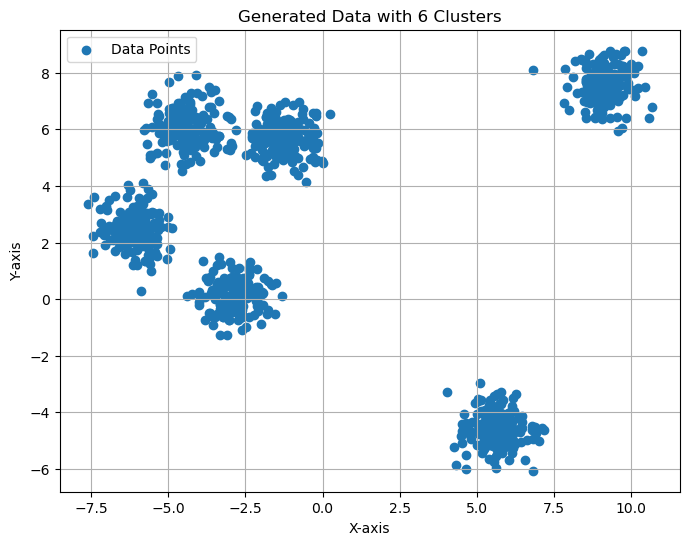

In [5]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], label='Data Points')
plt.title('Generated Data with {} Clusters'.format(num_clusters))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

### Optimal Number of Clusters Analysis
To determine the best number of clusters (K), we will perform Elbow and Silhouette Analyses. We'll then visualize the silhouette scores for K-1, K, and K+1 to validate our choice of K.

The optimal number of clusters based on silhouette score is: 6


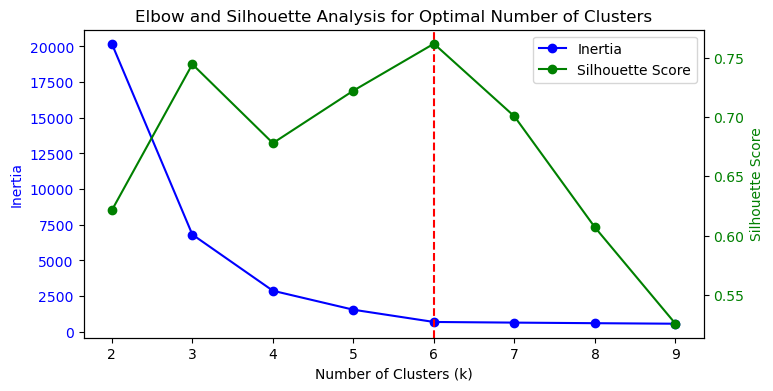

In [6]:
# Plot Elbow and Silhouette Analyses for K in the Range 2 to 9
plot_kmeans_optimal_clusters(data_points, range(2, 10))

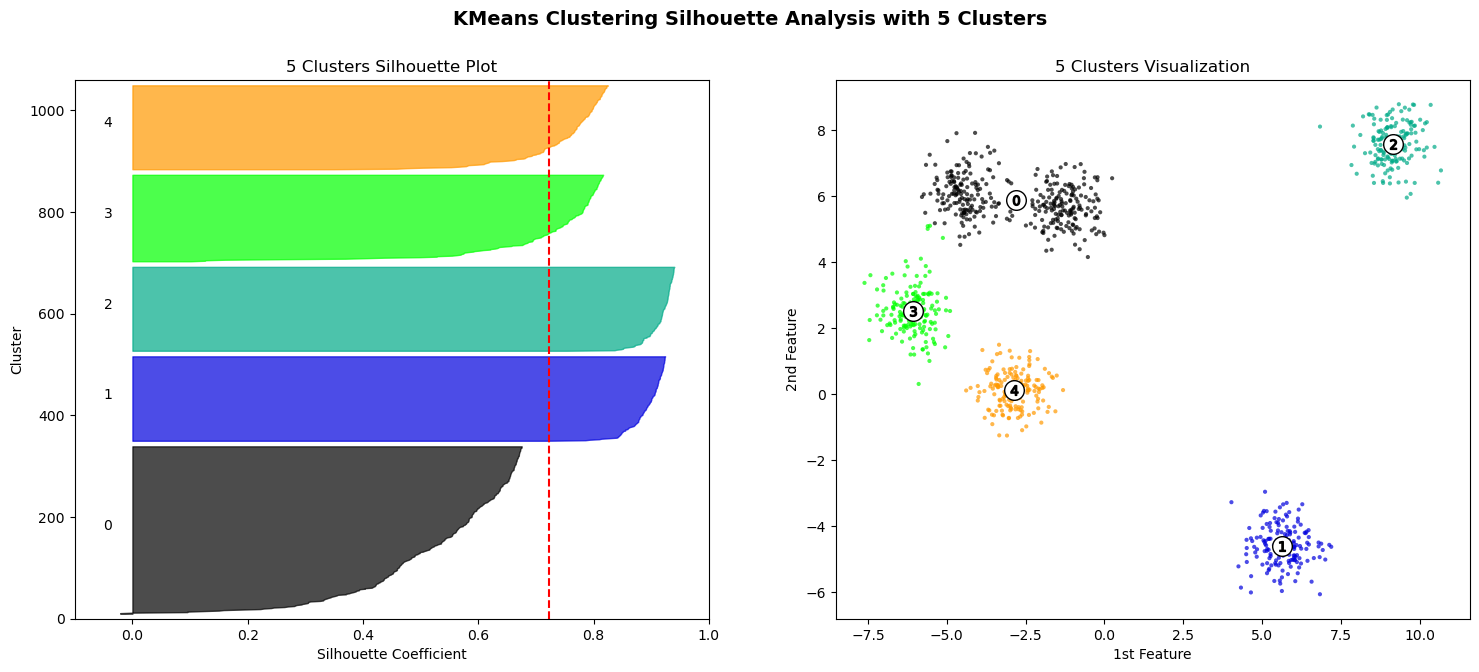

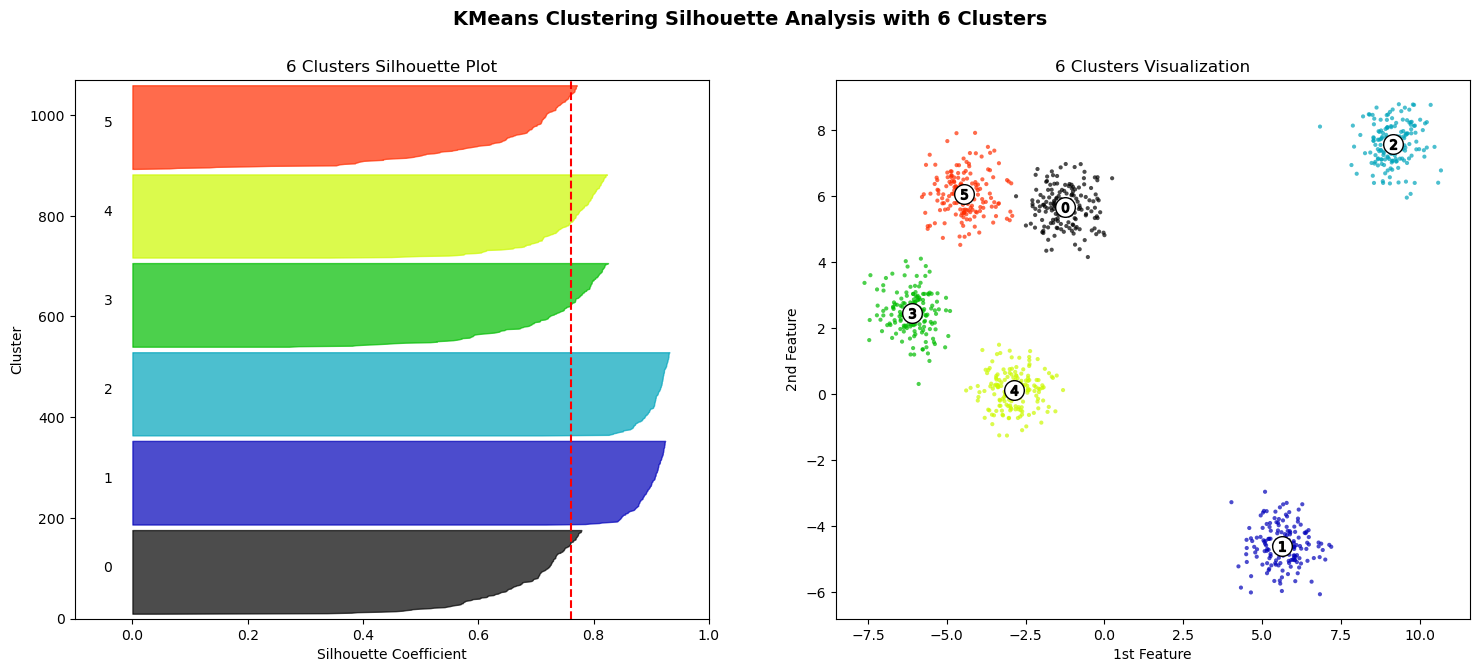

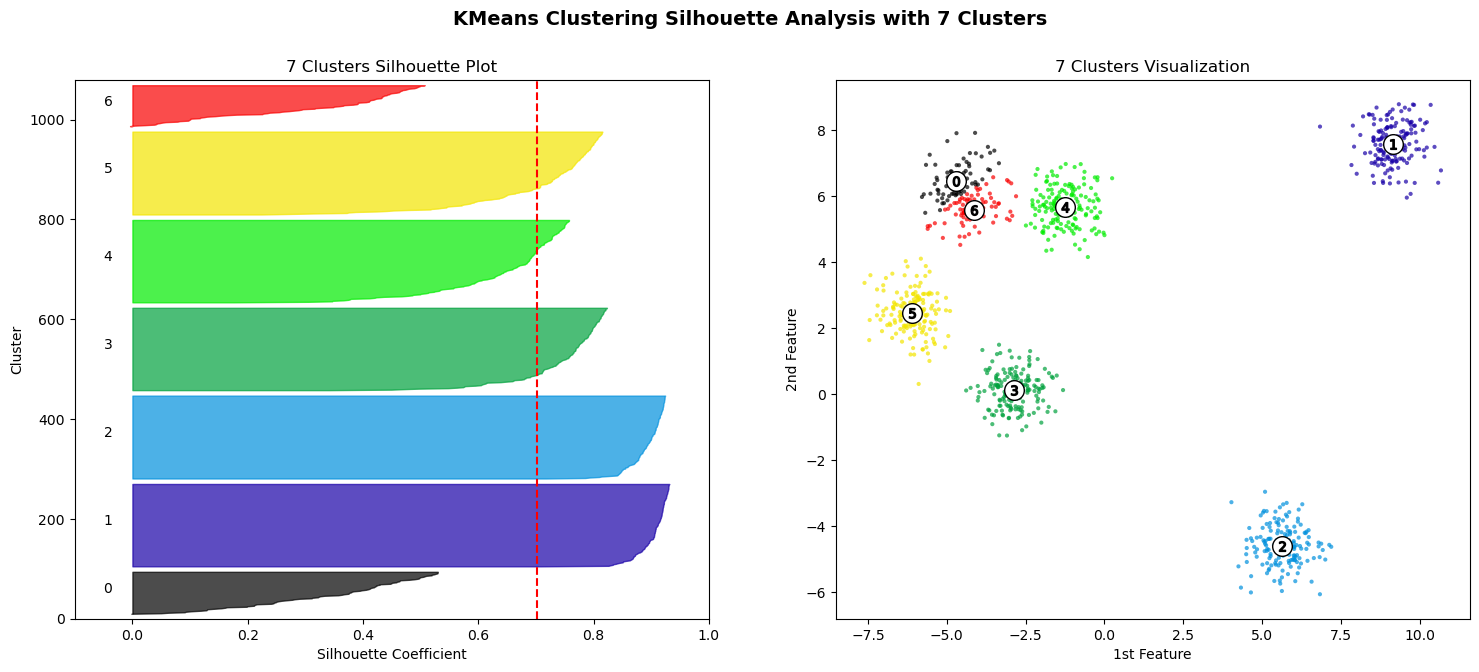

In [7]:
plot_kmeans_silhouette_analysis(data_points, [5, 6, 7])

The Silhouette Analysis comparing `k=5`, `k=6`, and `k=7` indicates that `k=6` is the optimal cluster number for our dataset. At `k=6`, clusters show higher silhouette coefficients, suggesting tighter groupings and clearer separation. In contrast, `k=5` has some overlap, and `k=7` introduces sparsity, indicating over-segmentation. Therefore, `k=6` strikes the best balance between cluster cohesion and separation, providing a well-defined structure suitable for our KMeans clustering model.

## Conclusion: Optimal `k` in K-Means Clustering
To find the best number of clusters (`k`) for grouping our data, we use two methods together: the Elbow method and the Silhouette method. The Elbow method helps us see when adding more clusters doesn't make much difference anymore. The Silhouette method then shows us how well the data points fit into these clusters. By looking at both, we can pick the best `k` that makes our clusters clear and meaningful.